In [1]:
import os
os.getcwd()

'/home/kyoung/research/decorrelating_errors/code'

In [2]:
from pauli_channel_approximation import PCA

ImportError: cannot import name 'logsumexp'

In [3]:
import dill
with open('0_pickled_controls106.pkl', 'rb') as f:
    data0 = dill.load(f)
with open('1_pickled_controls106.pkl', 'rb') as f:
    data1 = dill.load(f)


AttributeError: module 'cvxpy' has no attribute 'lin_ops'

In [ ]:
import numpy as np
import scipy as sp
import numpy.linalg as lin
import scipy.linalg as slin

import os; os.environ['PYGSTI_BACKCOMPAT_WARNING'] = '0'
import pygsti 

try:
    from matplotlib import pyplot as plt
    import seaborn as sns
    sns.set_style('white')
    %matplotlib inline
except ImportError:
    pass


In [100]:
list(zip(data0.probs, data1.probs))

[(array([0.]), array([0.])),
 (array([8.29590731e-07]), array([4.481457e-07])),
 (array([8.60727421e-07]), array([4.61895819e-07])),
 (array([8.8896146e-07]), array([4.67174885e-07])),
 (array([8.92902801e-07]), array([4.70853162e-07])),
 (array([9.20439815e-07]), array([5.0474328e-07])),
 (array([9.35385443e-07]), array([5.06735067e-07])),
 (array([9.50980137e-07]), array([5.30582409e-07])),
 (array([9.83954296e-07]), array([5.33420461e-07])),
 (array([1.00635813e-06]), array([5.36555264e-07])),
 (array([1.01498946e-06]), array([5.45321747e-07])),
 (array([1.01789513e-06]), array([5.70526559e-07])),
 (array([1.01978464e-06]), array([5.87002823e-07])),
 (array([1.04139581e-06]), array([5.92542975e-07])),
 (array([1.05165077e-06]), array([6.33772936e-07])),
 (array([1.07061318e-06]), array([6.39007014e-07])),
 (array([1.08349959e-06]), array([6.44258564e-07])),
 (array([1.08574939e-06]), array([6.45807767e-07])),
 (array([1.09650218e-06]), array([6.5361538e-07])),
 (array([1.10924594e-0

(array([512.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   4.,  64., 196., 149.,  74.,  16.,   9.]),
 array([0.        , 0.00012119, 0.00024238, 0.00036357, 0.00048476,
        0.00060594, 0.00072713, 0.00084832, 0.00096951, 0.0010907 ,
        0.00121189, 0.00133308, 0.00145427, 0.00157546, 0.00169664,
        0.00181783, 0.00193902, 0.00206021, 0.0021814 , 0.00230259,
        0.00242378]),
 <a list of 20 Patch objects>)

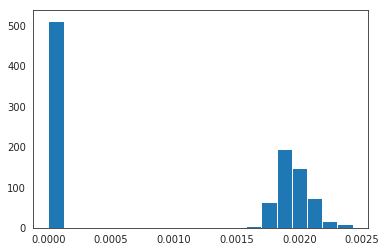

In [107]:
plt.hist(np.array(data0.probs).T[0], bins=20)

(array([512., 283., 100.,  38.,  26.,  10.,  13.,   7.,   1.,   2.,   6.,
          7.,   7.,   2.,   0.,   1.,   3.,   4.,   0.,   2.]),
 array([0.        , 0.00063278, 0.00126556, 0.00189834, 0.00253112,
        0.0031639 , 0.00379668, 0.00442946, 0.00506223, 0.00569501,
        0.00632779, 0.00696057, 0.00759335, 0.00822613, 0.00885891,
        0.00949169, 0.01012447, 0.01075725, 0.01139003, 0.01202281,
        0.01265559]),
 <a list of 20 Patch objects>)

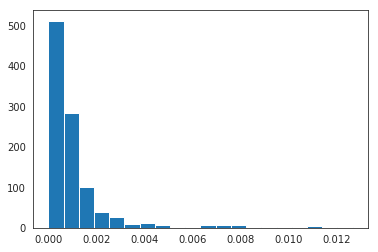

In [106]:
plt.hist(np.array(data1.probs).T[0], bins=20)

KeyboardInterrupt: 

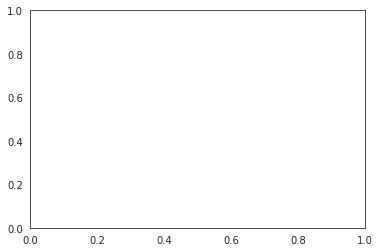

In [101]:
plt.hist(data1.probs)

In [110]:

len(data.controlset)

1024

In [114]:
sigI = np.array([[1.,0],[0, 1]], dtype='complex')
sigX = np.array([[0, 1],[1, 0]], dtype='complex')
sigY = np.array([[0,-1],[1, 0]], dtype='complex') * 1.j
sigZ = np.array([[1, 0],[0,-1]], dtype='complex')
sigM = (sigX - 1.j*sigY)/2.
sigP = (sigX + 1.j*sigY)/2.

In [ ]:
data.target_operator

In [121]:
data.probs

[array([0.]),
 array([8.29590731e-07]),
 array([8.60727421e-07]),
 array([8.8896146e-07]),
 array([8.92902801e-07]),
 array([9.20439815e-07]),
 array([9.35385443e-07]),
 array([9.50980137e-07]),
 array([9.83954296e-07]),
 array([1.00635813e-06]),
 array([1.01498946e-06]),
 array([1.01789513e-06]),
 array([1.01978464e-06]),
 array([1.04139581e-06]),
 array([1.05165077e-06]),
 array([1.07061318e-06]),
 array([1.08349959e-06]),
 array([1.08574939e-06]),
 array([1.09650218e-06]),
 array([1.10924594e-06]),
 array([1.11357657e-06]),
 array([1.11518792e-06]),
 array([1.11630945e-06]),
 array([1.12015826e-06]),
 array([1.12699017e-06]),
 array([1.12957246e-06]),
 array([1.13588107e-06]),
 array([1.13887137e-06]),
 array([1.13937316e-06]),
 array([1.14510036e-06]),
 array([1.15191564e-06]),
 array([1.15253127e-06]),
 array([1.15891374e-06]),
 array([1.1592124e-06]),
 array([1.16000314e-06]),
 array([1.16116286e-06]),
 array([1.16231519e-06]),
 array([1.16297777e-06]),
 array([1.16367046e-06]),


In [120]:
pygsti.tools.optools.unitary_to_pauligate

In [36]:
def get_unitary(c_ind, epsilon1, epsilon2, delta1, delta2):
    u = np.eye(4, dtype='complex')
    
    a = epsilon1 * data.ambient_hamiltonian[0]
    b = epsilon2 * data.ambient_hamiltonian[1]
    c = data.ambient_hamiltonian[2] 
    h0 = a+b+c
    
    for t_ind in range(500):
        d = (1+delta2) * data.controlset[c_ind][t_ind][0] * data.control_hamiltonians[0]
        e = (1+delta2) * data.controlset[c_ind][t_ind][1] * data.control_hamiltonians[1] 
        f = (1+delta1) * data.controlset[c_ind][t_ind][2] * data.control_hamiltonians[2] 
        g = (1+delta1) * data.controlset[c_ind][t_ind][3] * data.control_hamiltonians[3] 
        ham = h0 + d + e + f + g
        u = np.dot(slin.expm(-1.j*ham*data.dt), u)
    
    return u        

In [34]:
from time import time

In [54]:
t1 = time()
u = get_unitary(34,0,0,0,0)
print(time()-t1)

0.13002777099609375


In [43]:
import pygsti

In [79]:
iSWAP = np.zeros([4,4], dtype='complex')
iSWAP[0,0] = 1
iSWAP[3,3] = 1
iSWAP[1,2] = -1.j
iSWAP[2,1] = -1.j
piSWAP = np.kron(iSWAP.conj(), iSWAP)
piSWAP = pygsti.tools.basistools.change_basis(piSWAP, 'std', 'pp')
pu = pygsti.tools.basistools.change_basis(np.kron(u.conj(), u), 'std', 'pp')

In [81]:
t1=time()
pygsti.tools.optools.diamonddist(piSWAP, pu, 'pp')
print(time()-t1)

1.2330574989318848


In [124]:
cd ./figures

/home/kyoung/research/decorrelating_errors/code/figures


In [126]:
ls

0_epsilon_correlated_dense.pdf  delta_correlated.pdf          epsilon.dat
0_epsilon.dat                   delta.dat                     errors_kcy.pdf
399.pdf                         epsilon_correlated_dense.pdf  several.pdf
delta_correlated_dense.pdf      epsilon_correlated.pdf        test.pdf


In [128]:
with open('./0_epsilon.dat', 'rb') as f:
    ep0 = dill.load(f)
with open('./epsilon.dat', 'rb') as f:
    ep1 = dill.load(f)

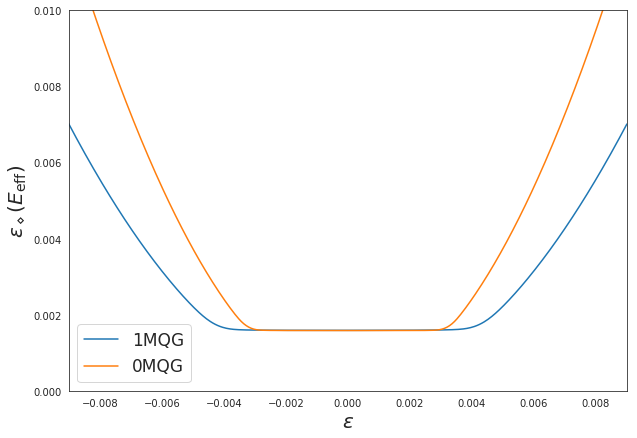

In [146]:
plt.figure(figsize=(10,7))
plt.plot(ep0['vals'], ep0['diamond_distances'], label='1MQG')
plt.plot(ep1['vals'], ep1['diamond_distances'], label='0MQG')
plt.xlabel("$\epsilon$", fontsize=20)
plt.ylabel("$\epsilon_\diamond(E_{\mathrm{eff}})$", fontsize=20)
plt.ylim(0,0.01)
plt.xlim(-0.009, 0.009)
plt.legend(fontsize=17)